In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [54]:
pf = pd.read_csv('train.csv')

In [55]:
bl = pd.read_csv('BreedLabels.csv')

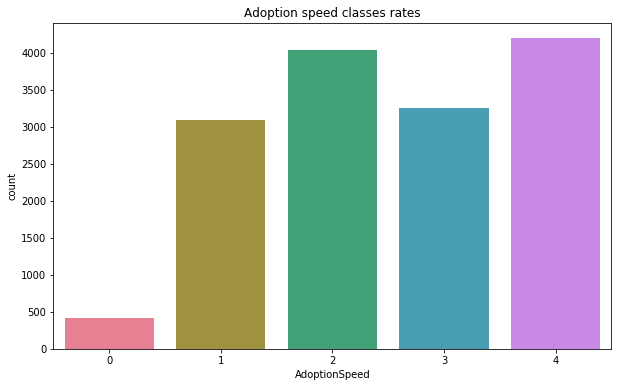

In [59]:
plt.figure(figsize=(10, 6))
g = sns.countplot(x='AdoptionSpeed', data=pf, palette = 'husl');
plt.title('Adoption speed classes rates');
ax=g.axes

In [60]:
breeds_dict = {k: v for k, v in zip(bl['BreedID'], bl['BreedName'])}

In [61]:
pf['Breed1_name'] = pf['Breed1'].apply(lambda x: '_'.join(breeds_dict[x].split()) if x in breeds_dict else 'Unknown')
pf['Breed2_name'] = pf['Breed2'].apply(lambda x: '_'.join(breeds_dict[x].split()) if x in breeds_dict else '-')


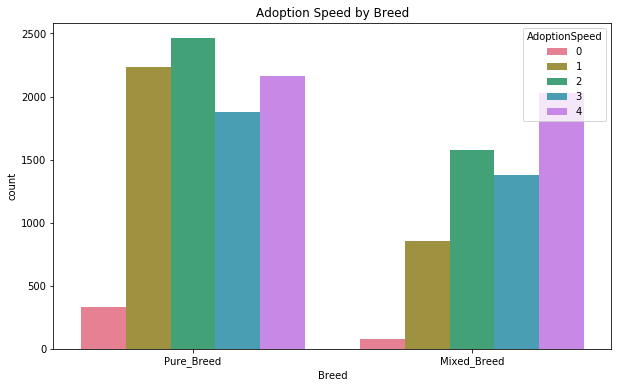

In [63]:
plt.figure(figsize=(10, 6))
npf = pf
npf['Breed'] = npf['Breed1_name'].apply(lambda x:  'Pure_Breed' if x != 'Mixed_Breed' else 'Mixed_Breed')
sns.countplot(npf.Breed, hue=pf.AdoptionSpeed, palette='husl') 
plt.title('Adoption Speed by Breed')
plt.show()

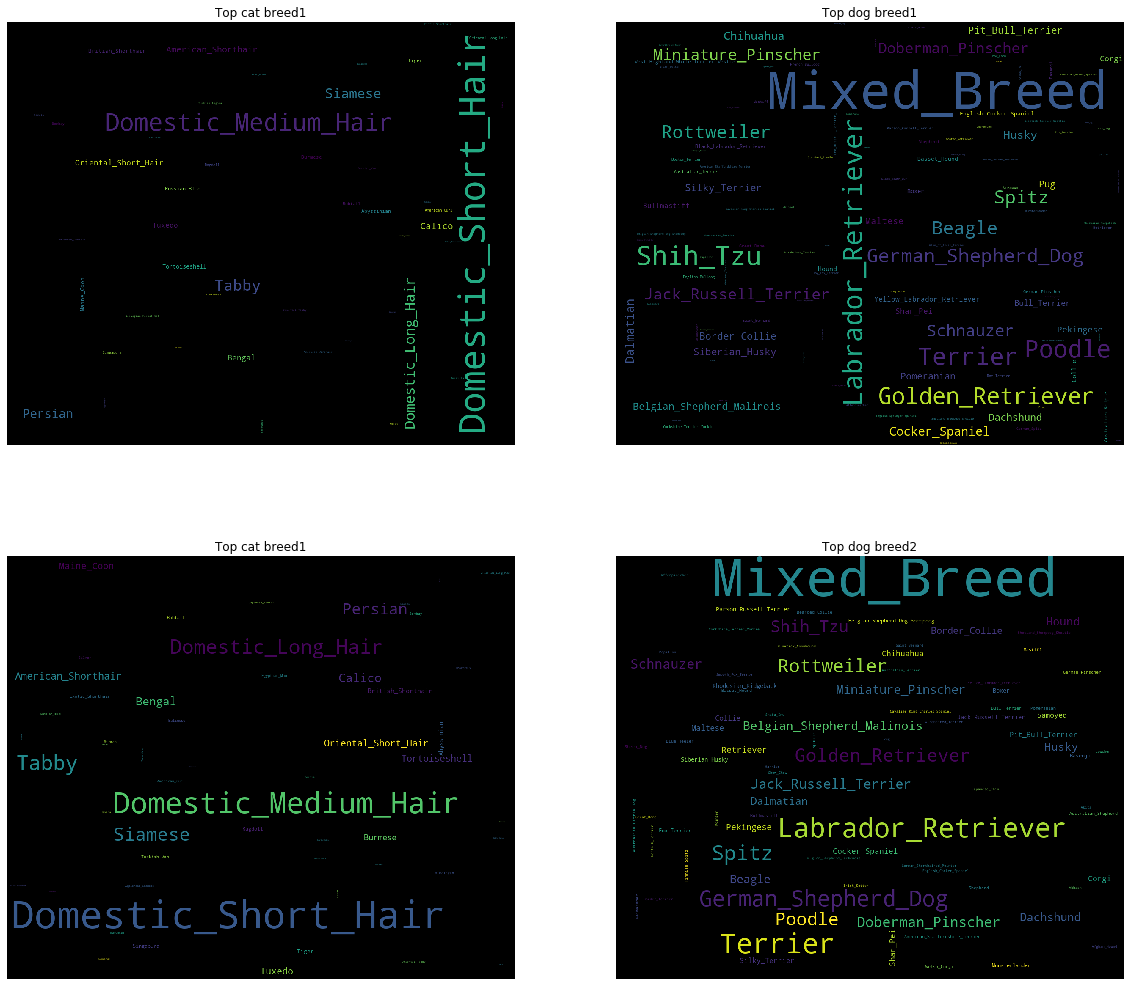

In [93]:
from wordcloud import WordCloud, ImageColorGenerator

fig, ax = plt.subplots(figsize = (20, 18))
plt.subplot(2, 2, 1)
text_cat1 = ' '.join(pf.loc[pf['Type'] == 2, 'Breed1_name'].fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='black', collocations=False,
                      width=1200, height=1000).generate(text_cat1)
plt.imshow(wordcloud)
plt.title('Top cat breed1')
plt.axis("off")

plt.subplot(2, 2, 2)
text_dog1 = ' '.join(pf.loc[pf['Type'] == 1, 'Breed1_name'].fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='black', collocations=False,
                      width=1200, height=1000).generate(text_dog1)
plt.imshow(wordcloud)
plt.title('Top dog breed1')
plt.axis("off")

plt.subplot(2, 2, 3)
text_cat2 = ' '.join(pf.loc[pf['Type'] == 2, 'Breed2_name'].fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='black', collocations=False,
                      width=1200, height=1000).generate(text_cat2)
plt.imshow(wordcloud)
plt.title('Top cat breed1')
plt.axis("off")

plt.subplot(2, 2, 4)
text_dog2 = ' '.join(pf.loc[pf['Type'] == 1, 'Breed2_name'].fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='black', collocations=False,
                      width=1200, height=1000).generate(text_dog2)
plt.imshow(wordcloud)
plt.title('Top dog breed2')
plt.axis("off")
plt.show()

In [94]:
cl = pd.read_csv('ColorLabels.csv')

In [95]:
colors_dict = {k: v for k, v in zip(cl['ColorID'], cl['ColorName'])}
npf['Color1_name'] = pf['Color1'].apply(lambda x: colors_dict[x] if x in colors_dict else '-')
npf['Color2_name'] = pf['Color2'].apply(lambda x: colors_dict[x] if x in colors_dict else '-')
npf['Color3_name'] = pf['Color3'].apply(lambda x: colors_dict[x] if x in colors_dict else '-')


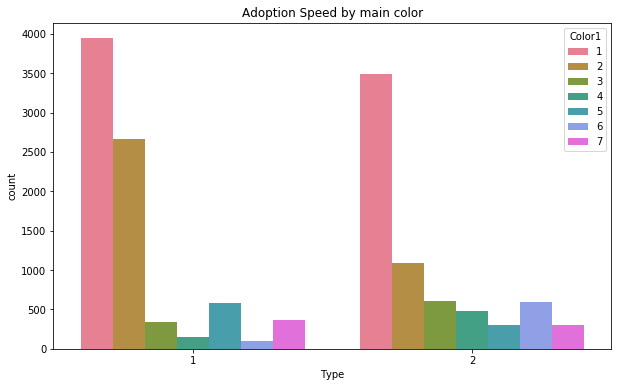

In [96]:
plt.figure(figsize=(10, 6))
sns.countplot(npf.Type, hue=npf.Color1, palette='husl') 
plt.title('Adoption Speed by main color')
plt.show()

In [97]:
npf['Allcolor'] = npf['Color1_name'] +'_'+ npf['Color2_name']

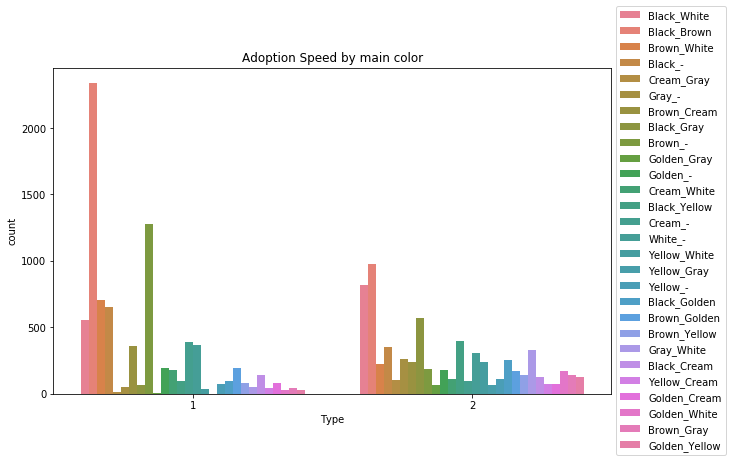

In [98]:
plt.figure(figsize=(10, 6))
sns.countplot(npf.Type, hue=npf.Allcolor, palette='husl') 
plt.title('Adoption Speed by main color')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

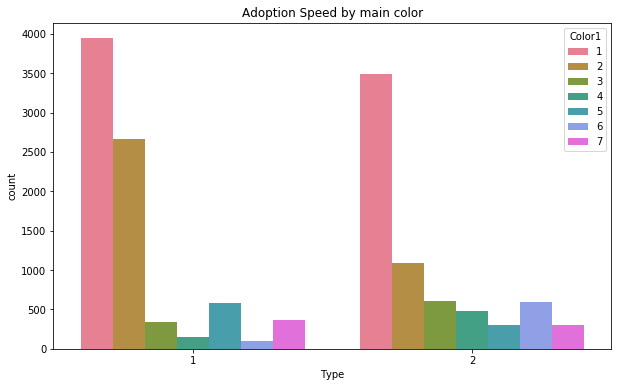

In [99]:
plt.figure(figsize=(10, 6))
sns.countplot(npf.Type, hue=npf.Color1, palette='husl') 
plt.title('Adoption Speed by main color')
plt.show()

In [67]:
npf = pf.fillna(',')
npf['token'] = npf.apply(lambda row: nltk.word_tokenize(row['Description']), axis = 1)


In [68]:
import nltk as nltk
import nltk.corpus  
from nltk.text import Text
import pandas as pd
import re
import sys
from nltk.corpus import stopwords

#default_stopwords = set(nltk.corpus.stopwords.words('english'))


all = list([a for b in npf.token.tolist() for a in b])
stopwords = set(nltk.corpus.stopwords.words('english'))
    #lower
all = [new.lower() for new in all]
    #remove stop
all = [new for new in all if new not in stopwords]
    # remove single 
all = [new for new in all if len(new)>1 ]
    #remove punc
all = [new for new in all if new.isalpha() ]
    #remove num
all = [new for new in all if not new.isnumeric()]


In [69]:
porter = nltk.PorterStemmer()
pall = [porter.stem(t) for t in all]
fdist = nltk.FreqDist(pall)
fdist.most_common(10)

[('adopt', 11715),
 ('love', 8221),
 ('home', 7984),
 ('dog', 6294),
 ('cat', 6068),
 ('pleas', 5709),
 ('kitten', 4543),
 ('play', 4140),
 ('puppi', 4103),
 ('look', 3800)]

In [70]:
lancaster = nltk.LancasterStemmer()
lall = [lancaster.stem(t) for t in all]
fdist = nltk.FreqDist(lall)
fdist.most_common(10)

[('adopt', 11734),
 ('lov', 9121),
 ('hom', 7987),
 ('dog', 6297),
 ('cat', 6078),
 ('pleas', 5731),
 ('kit', 4576),
 ('play', 4143),
 ('puppy', 4104),
 ('giv', 3883)]

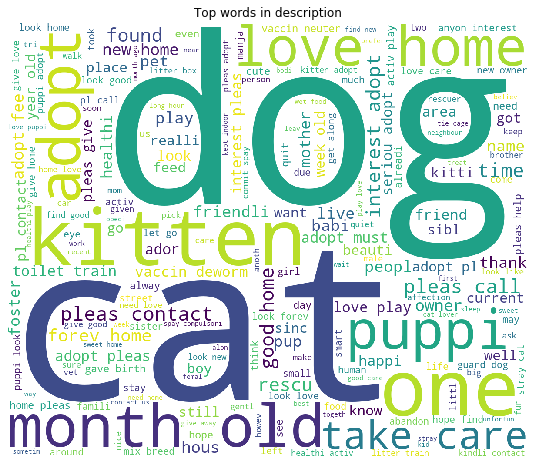

In [71]:
fig, ax = plt.subplots(figsize = (12, 8))
text_cat = ' '.join(pall)
wordcloud = WordCloud(max_font_size=None, background_color='white',
                      width=1200, height=1000).generate(text_cat)
plt.imshow(wordcloud)
plt.title('Top words in description');
plt.axis("off");

In [72]:

from langdetect import detect
from googletrans import Translator
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer

import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation

In [74]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

def get_top_n_bigram(corpus, ng, n=None):
    vec = CountVectorizer(ngram_range=(ng, ng), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(npf['Description'],ng=2 ,n = 20)
df4 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df4.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams in review after removing stop words')


In [75]:

common_words = get_top_n_bigram(npf['Description'],ng=3 , n = 20)
df4 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df4.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 trigrams in review after removing stop words')


In [76]:
s4 = npf[npf['AdoptionSpeed'] == 4]
s3 = npf[npf['AdoptionSpeed'] == 3]
s2 = npf[npf['AdoptionSpeed'] == 2]
s1 = npf[npf['AdoptionSpeed'] == 1]
s0 = npf[npf['AdoptionSpeed'] == 0]


for i in [s0,s1,s2,s3,s4]:
    common_words = get_top_n_bigram(i['Description'],ng=3 , n = 20)
    df4 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
    df4.groupby('ReviewText').sum()['count'].sort_values(ascending=False).iplot(
        kind='bar', yTitle='Count', linecolor='black', title=('Top 20 bigrams'))


In [167]:
X = npf['Description']
y = npf['AdoptionSpeed']
from sklearn.model_selection import train_test_split
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfTransformer, TfidfVectorizer


tv = TfidfVectorizer(ngram_range=(2, 2),stop_words='english', max_features=100000,strip_accents='unicode',
                                    lowercase=True,
                                    token_pattern=r'\b[a-zA-Z]{3,}\b',
                                    max_df=0.5, 
                                    min_df=10)
train_tfidf = tv.fit_transform(X)
#test_tfidf = tv.fit(X_test)



smt = SMOTE(random_state=777, k_neighbors=1)
X_SMOTE, y_SMOTE = smt.fit_sample(train_tfidf, y)
#pd.DataFrame(X_SMOTE.todense(), columns=tv.get_feature_names())


X_train, X_test, y_train, y_test = train_test_split(X_SMOTE, y_SMOTE , test_size = 0.2, random_state = 42)

rf = RandomForestClassifier()

rf2 = rf.fit(X_train, y_train)

y_pred = rf2.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.5151298546580891
              precision    recall  f1-score   support

           0       0.63      0.97      0.77       840
           1       0.49      0.47      0.48       829
           2       0.38      0.31      0.34       828
           3       0.52      0.42      0.47       871
           4       0.46      0.40      0.43       829

    accuracy                           0.52      4197
   macro avg       0.50      0.51      0.50      4197
weighted avg       0.50      0.52      0.50      4197



In [79]:
y_SMOTE.value_counts()

4    4197
3    4197
2    4197
1    4197
0    4197
Name: AdoptionSpeed, dtype: int64

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X_SMOTE, y_SMOTE , test_size = 0.3, random_state = 42)

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn import metrics

logreg = LogisticRegression(max_iter = 1000)

logreg1= logreg.fit(X_train, y_train)
y_pred = logreg1.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.4502858958068615


In [90]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.86      0.72      1275
           1       0.38      0.34      0.36      1253
           2       0.33      0.28      0.30      1233
           3       0.38      0.35      0.36      1277
           4       0.43      0.43      0.43      1258

    accuracy                           0.45      6296
   macro avg       0.43      0.45      0.43      6296
weighted avg       0.43      0.45      0.44      6296



In [92]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb1= nb.fit(X_train, y_train)
y_pred = nb1.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.40009529860228715


In [135]:

stopwords = set(nltk.corpus.stopwords.words('english'))
#lower
npf['token3'] = npf['token'].apply(lambda x: [y.lower() for y in x])
#remove stop
npf['token3'] = npf['token3'].map(lambda x: [y for y in x if y not in stopwords]) 
# remove single 
npf['token3'] = npf['token3'].map(lambda x: [y for y in x if len(y)>1 ]) 
#remove punc
#npf['token3'] = npf['token3'].map(lambda x: [y for y in x if y.isalpha() ])

0        [nibble, 3+, month, old, ball, cuteness, energ...
1        [found, alone, yesterday, near, apartment, sha...
2        [pregnant, mother, dumped, irresponsible, owne...
3        [good, guard, dog, alert, active, obedience, w...
4        [handsome, yet, cute, boy, adoption, playful, ...
5              [stray, kitten, came, house, feeding, keep]
6        [anyone, within, area, ipoh, taiping, interest...
7        [siu, pak, give, birth, 13/6/10, 6puppies, int...
8        [healthy, active, feisty, kitten, found, neigh...
9        [manja, gentle, stray, cat, found, would, real...
10       [serious, adopter, please, sms, call, details,...
11       [kali, super, playful, kitten, go, minute, wak...
12       [peanut, abused, puppy, rescued, scared, peopl...
13       [hi, pet, lovers, first, posting, need, help, ...
14       [lost, dog, found, bandar, menjalara, kepong／t...
15       [moved, apartment, landed, home, many, friendl...
16                       [spayed, /12, adorable, friendl

In [137]:
stemmer =  nltk.PorterStemmer()
npf['token2'] = npf['token3'].apply(lambda x: [stemmer.stem(y) for y in x]) # Stem every word.


0        [nibbl, 3+, month, old, ball, cute, energet, p...
1        [found, alon, yesterday, near, apart, shake, b...
2        [pregnant, mother, dump, irrespons, owner, roa...
3        [good, guard, dog, alert, activ, obedi, wait, ...
4        [handsom, yet, cute, boy, adopt, play, pal, 'v...
5                  [stray, kitten, came, hous, feed, keep]
6        [anyon, within, area, ipoh, taip, interest, ad...
7        [siu, pak, give, birth, 13/6/10, 6puppi, inter...
8        [healthi, activ, feisti, kitten, found, neighb...
9        [manja, gentl, stray, cat, found, would, reall...
10         [seriou, adopt, pleas, sm, call, detail, thank]
11       [kali, super, play, kitten, go, minut, wake, q...
12       [peanut, abus, puppi, rescu, scare, peopl, hap...
13       [hi, pet, lover, first, post, need, help, mont...
14       [lost, dog, found, bandar, menjalara, kepong／t...
15       [move, apart, land, home, mani, friendli, stra...
16                             [spay, /12, ador, friendl

In [145]:
npf['token4'] = npf['token2'].apply(lambda x:' '.join(y for y in x))
X = npf['token4']
y = npf['AdoptionSpeed']

#ngram_range=(3, 3)
tfidf = TfidfVectorizer(stop_words='english', max_features=100000, max_df=0.5,min_df=10)
tfs = tv.fit_transform(X)
#test_tfidf = tv.fit(X_test)
tfs.shape

(14993, 2974)

In [149]:
smt = SMOTE(random_state=777, k_neighbors=1)
X_S, y_S = smt.fit_sample(tfs, y)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_S, y_S , test_size = 0.3, random_state = 42)

logreg = LogisticRegression(max_iter = 1000)

logreg2= logreg.fit(X_train_s, y_train_s)
y_pred_s = logreg2.predict(X_test_s)
print(metrics.accuracy_score(y_test_s, y_pred_s))

0.4385324015247776


In [150]:
print(classification_report(y_test_s, y_pred_s))

              precision    recall  f1-score   support

           0       0.61      0.84      0.70      1275
           1       0.36      0.34      0.35      1253
           2       0.31      0.27      0.29      1233
           3       0.38      0.31      0.34      1277
           4       0.43      0.43      0.43      1258

    accuracy                           0.44      6296
   macro avg       0.42      0.44      0.42      6296
weighted avg       0.42      0.44      0.42      6296



In [162]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf1 = rf.fit(X_train_s, y_train_s)

y_pred_s = rf1.predict(X_test_s)

print(metrics.accuracy_score(y_test_s, y_pred_s))
print(classification_report(y_test_s, y_pred_s))

0.5535260482846251
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1275
           1       0.48      0.49      0.49      1253
           2       0.41      0.36      0.39      1233
           3       0.52      0.41      0.46      1277
           4       0.46      0.53      0.50      1258

    accuracy                           0.55      6296
   macro avg       0.54      0.55      0.54      6296
weighted avg       0.54      0.55      0.54      6296



In [ ]:
rf = RandomForestClassifier()

rf1 = rf.fit(ida_x_train, y_train_s)

y_pred_s = rf1.predict(ida_x_test)

print(metrics.accuracy_score(y_test_s, y_pred_s))
print(classification_report(y_test_s, y_pred_s))

In [183]:
def bigrams(words, bi_min=15, tri_min=10):
    bigram = gensim.models.Phrases(words, min_count = bi_min)
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    return bigram_mod
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

def get_corpus(df):
    words = list(sent_to_words(df.token4))
    bigram_mod = bigrams(words)
    bigram = [bigram_mod[review] for review in words]
    id2word = gensim.corpora.Dictionary(bigram)
    id2word.filter_extremes(no_below=10, no_above=0.35)
    id2word.compactify()
    corpus = [id2word.doc2bow(text) for text in bigram]
    return corpus, id2word, bigram

train_corpus, train_id2word, bigram_train = get_corpus(npf)

In [185]:
import gensim
import logging # This allows for seeing if the model converges. A log file is created.
logging.basicConfig(filename='lda_model.log', format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

#with warnings.catch_warnings():
 #   warnings.simplefilter('ignore')
lda_train = gensim.models.ldamulticore.LdaMulticore(
                           corpus=train_corpus,
                           num_topics=20,
                           id2word=train_id2word,
                           chunksize=100,
                           workers=7, # Num. Processing Cores - 1
                           passes=50,
                           eval_every = 1,
                           per_word_topics=True)
lda_train.save('lda_train.model')

In [186]:
lda_train.print_topics(20,num_words=15)[:10]

[(0,
  '0.053*"saya" + 0.050*"dan" + 0.030*"di" + 0.028*"yang" + 0.024*"untuk" + 0.021*"tak" + 0.020*"kuce" + 0.019*"boleh" + 0.017*"ada" + 0.016*"mereka" + 0.014*"dia" + 0.013*"baru" + 0.011*"dengan" + 0.011*"sangat" + 0.010*"akan"'),
 (1,
  '0.052*"play" + 0.048*"black" + 0.046*"kitten" + 0.041*"activ" + 0.041*"white" + 0.034*"male" + 0.029*"femal" + 0.027*"healthi" + 0.027*"cute" + 0.022*"brown" + 0.019*"one" + 0.019*"color" + 0.016*"mix" + 0.015*"colour" + 0.013*"friendli"'),
 (2,
  '0.062*"interest" + 0.058*"kindli_contact" + 0.039*"mr" + 0.038*"ms" + 0.038*"born" + 0.034*"pleas_contact" + 0.029*"spay" + 0.028*"playful" + 0.025*"seriou_adopt" + 0.024*"month" + 0.020*"cuddli" + 0.020*"good_tempera" + 0.019*"hous" + 0.015*"april" + 0.014*"adoption"'),
 (3,
  '0.049*"pl" + 0.035*"pl_call" + 0.027*"interest" + 0.023*"long_hour" + 0.018*"tie_cage" + 0.017*"look" + 0.016*"famili" + 0.015*"cage_tie" + 0.015*"must" + 0.014*"good" + 0.014*"anim_lover" + 0.014*"need" + 0.013*"well" + 0.013*

In [189]:
#Converting Topics to Feature Vectors
train_vecs = []
for i in range(len(npf)):
    top_topics = lda_train.get_document_topics(train_corpus[i], minimum_probability=0.0)
    topic_vec = [top_topics[i][1] for i in range(20)]
    train_vecs.append(topic_vec)

In [203]:
from sklearn.model_selection import KFold
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score

from sklearn import linear_model
X = np.array(train_vecs)


kf = KFold(5, shuffle=True, random_state=42)
cv_lr_f1, cv_lrsgd_f1, cv_svcsgd_f1,  = [], [], []
for train_ind, val_ind in kf.split(X, y):
    # Assign CV IDX
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind]
    
    # Scale Data
    scaler = StandardScaler()
    X_train_scale = scaler.fit_transform(X_train)
    X_val_scale = scaler.transform(X_val)
    # Logisitic Regression
    lr = LogisticRegression(
        max_iter = 4000,
        class_weight= 'balanced',
        solver='newton-cg',
        fit_intercept=True
    ).fit(X_train_scale, y_train)

    y_pred = lr.predict(X_val_scale)
    cv_lr_f1.append(metrics.accuracy_score(y_val, y_pred))
    # Logistic Regression SGD
    sgd = linear_model.SGDClassifier(
        max_iter=1000,
        tol=1e-3,
        loss='log',
        class_weight='balanced'
    ).fit(X_train_scale, y_train)
    
    y_pred = sgd.predict(X_val_scale)
    cv_lrsgd_f1.append(metrics.accuracy_score(y_val, y_pred))
    
    # SGD Modified Huber
    sgd_huber = linear_model.SGDClassifier(
        max_iter=1000,
        tol=1e-3,
        alpha=20,
        loss='modified_huber',
        class_weight='balanced'
    ).fit(X_train_scale, y_train)
    
    y_pred = sgd_huber.predict(X_val_scale)
    cv_svcsgd_f1.append(metrics.accuracy_score(y_val, y_pred))

cv_svcsgd_f1

//anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge

//anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:204: UserWarning:

Line Search failed

//anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge

//anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:204: UserWarning:

Line Search failed

//anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge

//anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:204: UserWarning:

Line Search failed

//anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge

//anaconda3/lib/python3.7/site-packages/sklearn/utils/optimize.py:204: UserWarning:

Line Search failed

//anaconda3/lib/python3.7/si

[0.26875625208402804,
 0.25208402800933644,
 0.2784261420473491,
 0.2781854569713142,
 0.21781187458305537]